#  <span style='color:midnightblue'>  Predicting Credit Default (Multiple Algorithms)

##  <span style='color:royalblue'>  1. Load required libraries </span>

In [15]:
library(klaR)
library(caret)
library(pROC)

##  <span style='color:royalblue'>  2. Load dataset </span>
The data set is made of 900 observations and 21 variables. Each observation corresponds to a credit given by a German bank, which includes the predicting variable (Default or No Default) and 20 other variables describing the credit facial data (amount, duration, purpose, etc.) and the loan-taker’s data (age, housing, job, etc.), all of which seem relevant to predict a default on the credit.<br><br>The variables chosen for this prediction exercise were: default, amount, duration, installment, residence, liable, age and cards. The reason behind this selection is the fact that these are the numerical variables in the data set, which allow a wider selection of prediction models.<br><br>For example KNN is based on Euclidean distances and cannot bare categorical variables. In order for all models to be comparable (by taking the same independent variables) I decided only to take the numerical ones in the data set.


In [2]:
credit_data <- read.csv("./credit_data.csv")
credit <- credit_data[,c("Default","amount","duration","installment","residence","liable", "age","cards")]
head(credit,5)

Default,amount,duration,installment,residence,liable,age,cards
0,1169,6,4,4,1,67,2
1,5951,48,2,2,1,22,1
0,2096,12,2,3,2,49,1
0,7882,42,2,4,2,45,1
1,4870,24,3,4,2,53,2


##  <span style='color:royalblue'>  2. Modifying Target variable </span>

In [3]:
credit2<-credit
credit2$Default<-rep(0,dim(credit2)[1])
credit2$Default[credit$Default==0]<-"NoDefault"
credit2$Default[credit$Default==1]<-"Default"

##  <span style='color:royalblue'>  3. Defining training and testing data sets </span>

In [4]:
inTrain<-createDataPartition(credit2$Default,p=3/4,list=FALSE)
trainSA<-credit2[inTrain,]
testSA<-credit2[-inTrain,]
trainY<-credit2$Default[inTrain]
testY<-credit2$Default[-inTrain]

par(mfrow=c(1,1))
ctrl<-trainControl(method="repeatedcv",repeats=3,classProbs=TRUE,summaryFunction=twoClassSummary)
cutoff=1/6

##  <span style='color:midnightblue'> Describe the chosen models; and explain your rationality of these choices

The models chosen were Naive Bayes, KNN, Random Forest and Logistic Regression. The decision for this choice is to have a diverse amount of prediction methodologies and see which ones yield better results. All of these models can predict binary outcomes (default and no default) which is the purpose of the exercise. Also all of this models work with numerical variables.<br><br>
In the case of KNN it is necessary to normalize the numerical variables in the dataset in order for the algorithm to work correctly. This is the only transformation that was applied to the dataset and it was performed exclusively in the code of this algorithm. Although we could run the KNN model just with just numerical data and all the other models including categorical data, if we want the models to be truly comparable, we must choose the same variables.<br><br> 
Another important parameter to have in mind is the threshold or cutoff probability for our models. Lets assume that lending into default is five times as costly as not lending to a good debtor. The expected costs of lending to a default credit is 5p if the loan is made and 1(1-p) if the loan is refused. If we expect to lose less by loaning than by turning away good loans then the following expression is true: 5p < 1 – p. Solving for p we have that the loan should be made is the probability of default is less than 1/6. Hence, we predict default when the probability of default is greater than 1/6. 

##  <span style='color:royalblue'>  4. Naive Bayes Model </span>

In [5]:
nbfit<-train(Default~.,data=credit2[inTrain,],method="nb",tuneLength=15,metric="ROC",trControl=ctrl)
pp_nb<-predict(nbfit,newdata=credit2[-inTrain,],type="prob")
p2_nb<-credit2$Default[-inTrain]
p2_nb[pp_nb[,1]>cutoff]<-"Default"
p2_nb[pp_nb[,1]<cutoff]<-"NoDefault"
print(length(p2_nb[p2_nb!=credit2[-inTrain,10]])/length(p2_nb))
rr_nb<-roc(credit2$Default[-inTrain],pp_nb[,2])

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X

“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabil

“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 57”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 68”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability 

“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for 

“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabili

“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability fo

“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability f

“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabili

“Numerical 0 probability for all classes with observation 64”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability f

“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 68”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabil

“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 57”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability

“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability f

“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability 

“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability 

“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 20”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 21”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabilit

“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 13”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 16”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 17”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 18”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability fo

“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabilit

“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for

“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabil

“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 57”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 12”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 19”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabili

“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 57”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 65”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 66”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 67”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 68”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 69”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 15”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabilit

“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 32”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 34”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 35”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 48”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 49”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 50”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 51”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 52”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 53”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 22”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 24”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 25”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 26”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 27”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 28”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 30”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 31”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 38”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 42”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 44”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 45”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 47”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 54”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 55”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 56”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 57”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 58”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 59”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 60”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 62”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 63”Warning message in FUN(X[[i]], ...):
“Numerical 0 probabi

“Numerical 0 probability for all classes with observation 137”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 138”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 139”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 140”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 141”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 142”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 143”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 144”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 145”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 146”Warning message in FUN(X[[i]], ...):
“Numerical

“Numerical 0 probability for all classes with observation 220”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 221”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 222”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 223”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 224”

[1] 0


Setting levels: control = Default, case = NoDefault
Setting direction: controls < cases


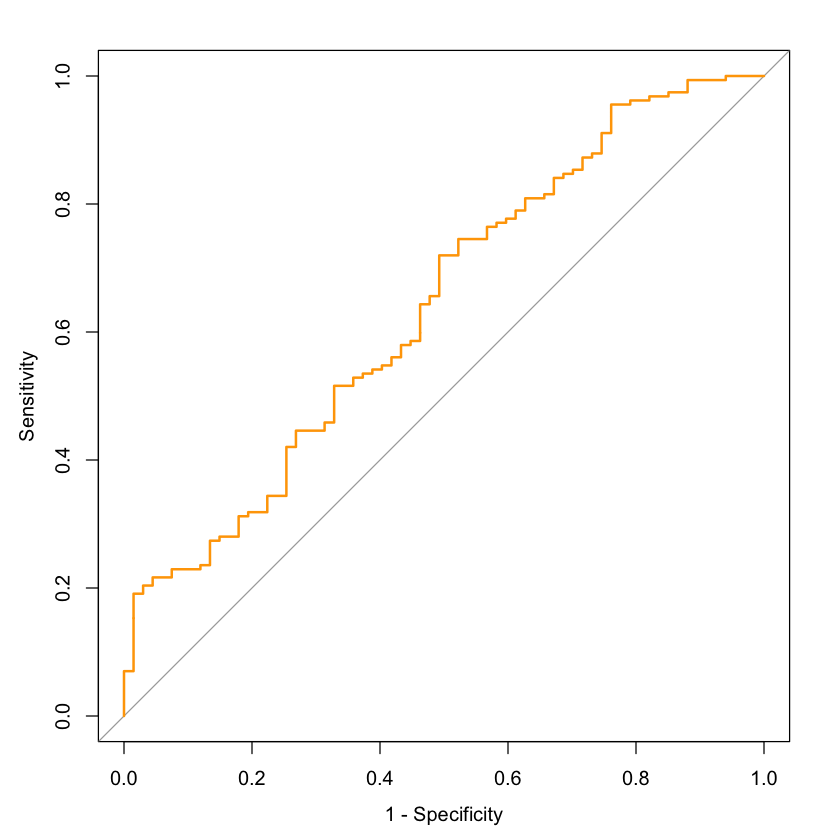

In [6]:
plot(rr_nb, col="orange",legacy.axes=TRUE)

In [7]:
#Naive Bayes Confusion Matrix
pred_nb<-factor(ifelse(pp_nb[,1] > cutoff, "Default", "NoDefault") )
obs<-factor(testSA$Default)
confusionMatrix(pred_nb, obs)

Confusion Matrix and Statistics

           Reference
Prediction  Default NoDefault
  Default        48        87
  NoDefault      19        70
                                          
               Accuracy : 0.5268          
                 95% CI : (0.4592, 0.5937)
    No Information Rate : 0.7009          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1257          
                                          
 Mcnemar's Test P-Value : 7.635e-11       
                                          
            Sensitivity : 0.7164          
            Specificity : 0.4459          
         Pos Pred Value : 0.3556          
         Neg Pred Value : 0.7865          
             Prevalence : 0.2991          
         Detection Rate : 0.2143          
   Detection Prevalence : 0.6027          
      Balanced Accuracy : 0.5811          
                                          
       'Positive' Class : Default      

##  <span style='color:royalblue'>  4. KNN Model </span>

[1] 0


Setting levels: control = Default, case = NoDefault
Setting direction: controls < cases


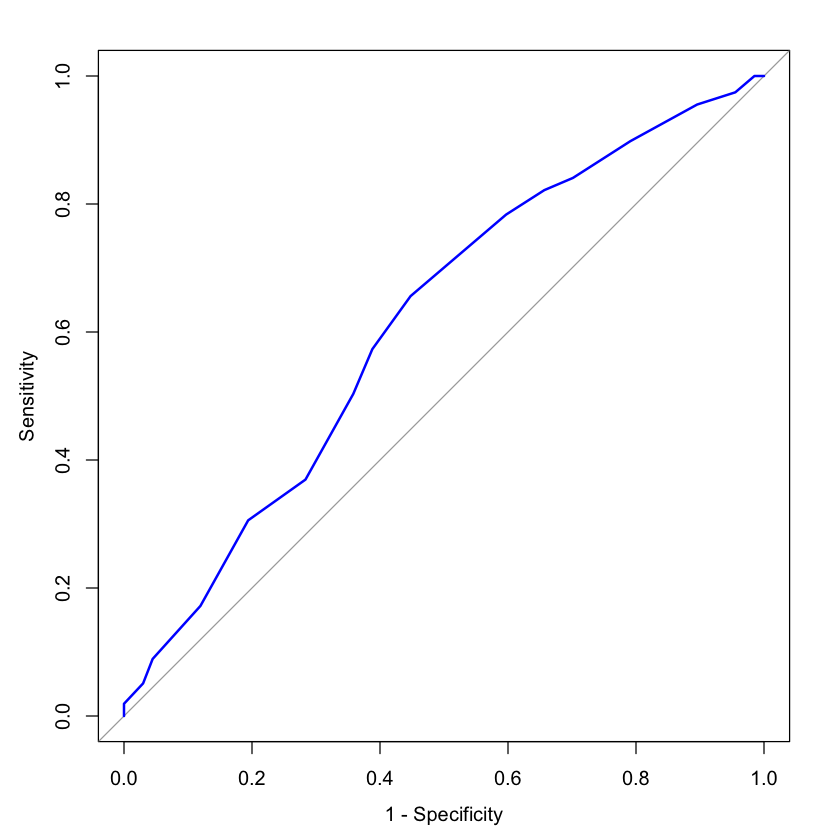

In [9]:
knnfit<-train(Default~.,data=credit2[inTrain,],method="knn",
              preProcess = c("center","scale"),tuneLength=30,
              metric="ROC",trControl=ctrl)
pp_knn<-predict(knnfit,newdata=credit2[-inTrain,],type="prob")
p2_knn<-credit2$Default[-inTrain]
p2_knn[pp_knn[,1]>cutoff]<-"Default"
p2_knn[pp_knn[,1]<cutoff]<-"NoDefault"
print(length(p2_knn[p2_knn!=credit2[-inTrain,10]])/length(p2_knn))
rr_knn<-roc(credit2$Default[-inTrain],pp_knn[,2])
plot(rr_knn,col="blue",legacy.axes=TRUE)

In [10]:
#KNN confusion matrix
pred_knn<-factor(ifelse(pp_knn[,1] > cutoff, "Default", "NoDefault") )
obs<-factor(testSA$Default)
confusionMatrix(pred_knn, obs)

Confusion Matrix and Statistics

           Reference
Prediction  Default NoDefault
  Default        59       130
  NoDefault       8        27
                                         
               Accuracy : 0.3839         
                 95% CI : (0.3199, 0.451)
    No Information Rate : 0.7009         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0345         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.8806         
            Specificity : 0.1720         
         Pos Pred Value : 0.3122         
         Neg Pred Value : 0.7714         
             Prevalence : 0.2991         
         Detection Rate : 0.2634         
   Detection Prevalence : 0.8438         
      Balanced Accuracy : 0.5263         
                                         
       'Positive' Class : Default        
                

##  <span style='color:royalblue'>  5. Random Forest Model </span>

note: only 6 unique complexity parameters in default grid. Truncating the grid to 6 .

[1] 0


Setting levels: control = Default, case = NoDefault
Setting direction: controls < cases


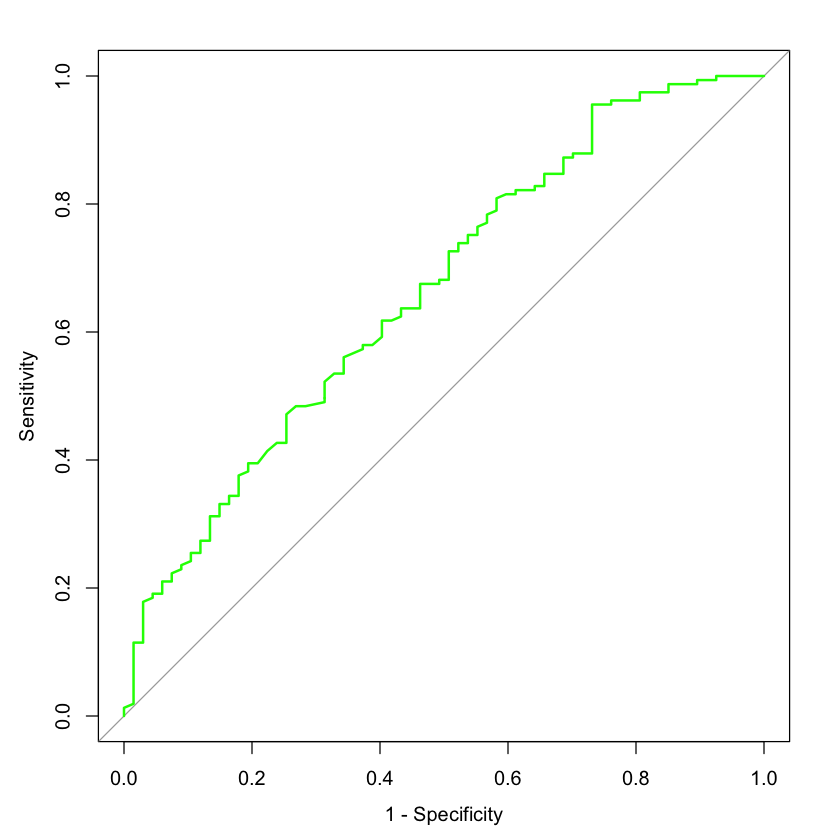

In [12]:
rffit<-train(Default~.,data=credit2[inTrain,],method="rf",tuneLength=15,metric="ROC",trControl=ctrl)
pp_rf<-predict(rffit,newdata=credit2[-inTrain,],type="prob")
p2_rf<-credit2$Default[-inTrain]
p2_rf[pp_rf[,1]>cutoff]<-"Default"
p2_rf[pp_rf[,1]<cutoff]<-"NoDefault"
print(length(p2_rf[p2_rf!=credit2[-inTrain,10]])/length(p2_rf))
rr_rf<-roc(credit2$Default[-inTrain],pp_rf[,2])
plot(rr_rf,col="green",legacy.axes=TRUE)


In [ ]:
#Random Forest Confusion Matrix
pred_rf<-factor(ifelse(pp_rf[,1] > cutoff, "Default", "NoDefault") )
obs<-factor(testSA$Default)
confusionMatrix(pred_rf, obs)

##  <span style='color:royalblue'>  6. Logistic Regression Model </span>

[1] 0


Setting levels: control = Default, case = NoDefault
Setting direction: controls < cases


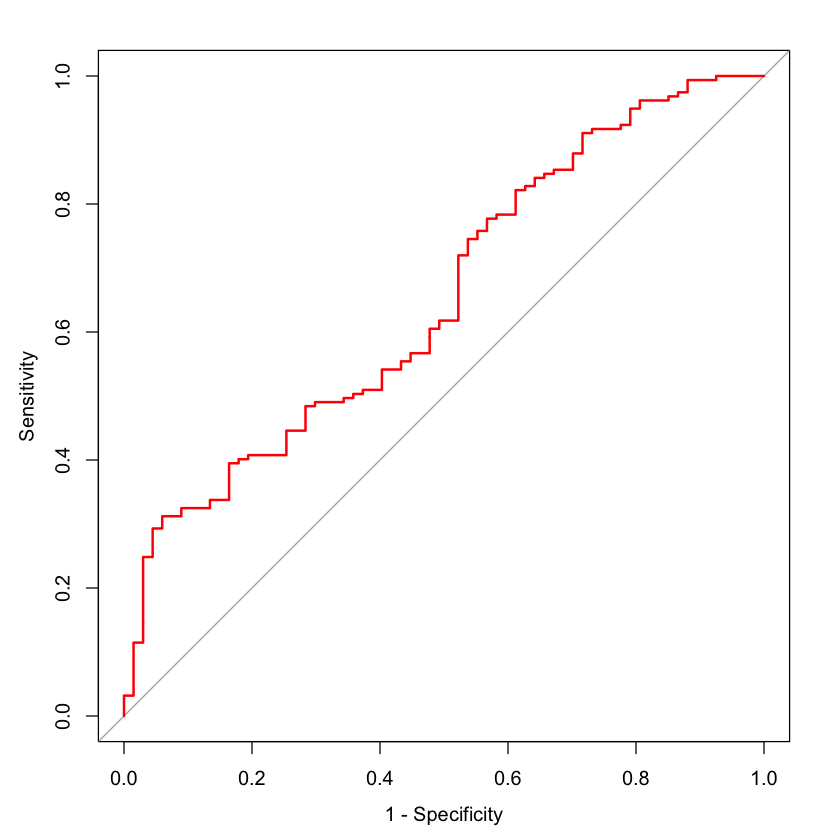

In [13]:
glmfit<-train(Default~.,data=credit2[inTrain,],method="glm",family="binomial",tuneLength=15,metric="ROC",trControl=ctrl)
pp_glm<-predict(glmfit,newdata=credit2[-inTrain,],type="prob")
p2_glm<-credit2$Default[-inTrain]
p2_glm[pp_glm[,1]>cutoff]<-"Default"
p2_glm[pp_glm[,1]<cutoff]<-"NoDefault"
print(length(p2_glm[p2_glm!=credit2[-inTrain,10]])/length(p2_glm))
rr_glm<-roc(credit2$Default[-inTrain],pp_glm[,2])
plot(rr_glm,col="red",legacy.axes=TRUE)

In [ ]:
#Logistic Regression Confusion Matrix
pred_glm<-factor(ifelse(pp_glm[,1] > cutoff, "Default", "NoDefault") )
obs<-factor(testSA$Default)
confusionMatrix(pred_glm, obs)

##  <span style='color:royalblue'>  7. AUC </span>

The R code provided graphs the ROC curves of each of the selected models. The ROC curve is important in predictive models because it shows in a graphical way the trade-off between sensitivity and specificity for every possible cut-off for a test. In other words, the ROC curves show the performance of the classification exercise by plotting the true positive rate and the false positive rate, which allows to compare if the model is actually predicting the correct values. <br><br>The areas under each of the ROC curves (AUC) give an idea about the benefit of using the tests in question. For this exercise the AUC’s are:


In [14]:
#AUC
auc(rr_nb)
auc(rr_knn)
auc(rr_rf)
auc(rr_glm)

Area under the curve: 0.6392

Area under the curve: 0.6145

Area under the curve: 0.6631

Area under the curve: 0.6522

Based on the AUC results it can be concluded that the best predicting models for this data set are random forest and Logistic Regression.

##  <span style='color:royalblue'>  8. Interpretation of your results and compare the analytical performance of at least two models

For comparing the Naïve Bayes and the Logistic Regression models the confusion Matrix for each of them were generated:

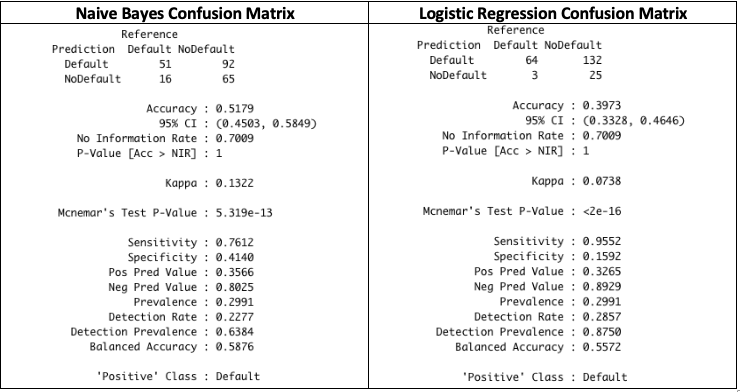

- **Accuracy:** The accuracy result can be misleading because the ‘Default’ class is unbalanced as 30% of the observations are default vs 70% of the observations which are no-default. For an imbalanced dataset, accuracy is not a valid measure of model performance. In this case we can observe that the accuracy of these models is low: 52% for Naïve Bayes and 40% for logistic regression.
- **Sensitivity:** The accuracy is measured as the number of correct positive predictions divided by the total number of positives. This measure is important because it gives us the percentage of credits predicted as default that were actually defaults. In this case we have better results for the models: sensitivity of 76% in Naïve Bayes and 95% in Logistic Regression. In here it is possible to determine that the models are quiet good at predicting actual defaults. 
- **False positives:** Although the sensitivity yields good results, the models are not quite good at predicting false positives, meaning there is a large number of good loans that are being predicted as defaulting loans. This means that the bank is turning away business and losing potential good clients.


**Conclusion:** Since the false negative cost is the highest, as determined earlier, the most optimal model will be the one with the minimum false negatives. In other words, a model with higher sensitivity will fetch a higher net revenue compared to other models. In this case the best model will be logistic regression because it resulted in just 3 false negatives, in contrast to the Naïve Bayes model that resulted in 16 false negatives. 